## 1. Problem Statement

- Build a prediction model for a health insurance company to predict the premium charge for policyholders.

## 2. Gathering Data

Data is retrieved from Kaggle.
- Dataset Source - https://www.kaggle.com/datasets/simranjain17/insurance?select=insurance.csv

## 3. Data Preprocessing

importing Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/insurance_premium_prediction/data/insurance.csv")

shape of data

In [ ]:
df.shape

(1338, 7)

Overview of data

In [ ]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
140,34,male,22.420,2,no,northeast,27375.90478
748,47,female,36.000,1,no,southwest,8556.90700
323,57,male,40.945,0,no,northeast,11566.30055
292,25,male,45.540,2,yes,southeast,42112.23560
422,40,male,32.775,1,yes,northeast,39125.33225


##### Duplicate Values

In [ ]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
df.loc[(df["bmi"]==30.59) & (df["charges"]==1639.5631)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


##### Data Type and non null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


##### age

In [ ]:
df.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

##### sex

In [ ]:
df.sex.value_counts()

,count
sex,
male,675
female,662


##### children

In [ ]:
df.children.value_counts()

,count
children,
0,573
1,324
2,240
3,157
4,25
5,18


##### smoker

In [ ]:
df.smoker.value_counts()

,count
smoker,
no,1063
yes,274


##### region

In [ ]:
df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


## 4. EDA

Stats of data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


Correlation of data

In [ ]:
sdf.select_dtypes(include=["float64","int64"]).corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


### Univariate analysis

#### 1. Categorical Data

**a**. countplot

Text(0, 0.5, '')

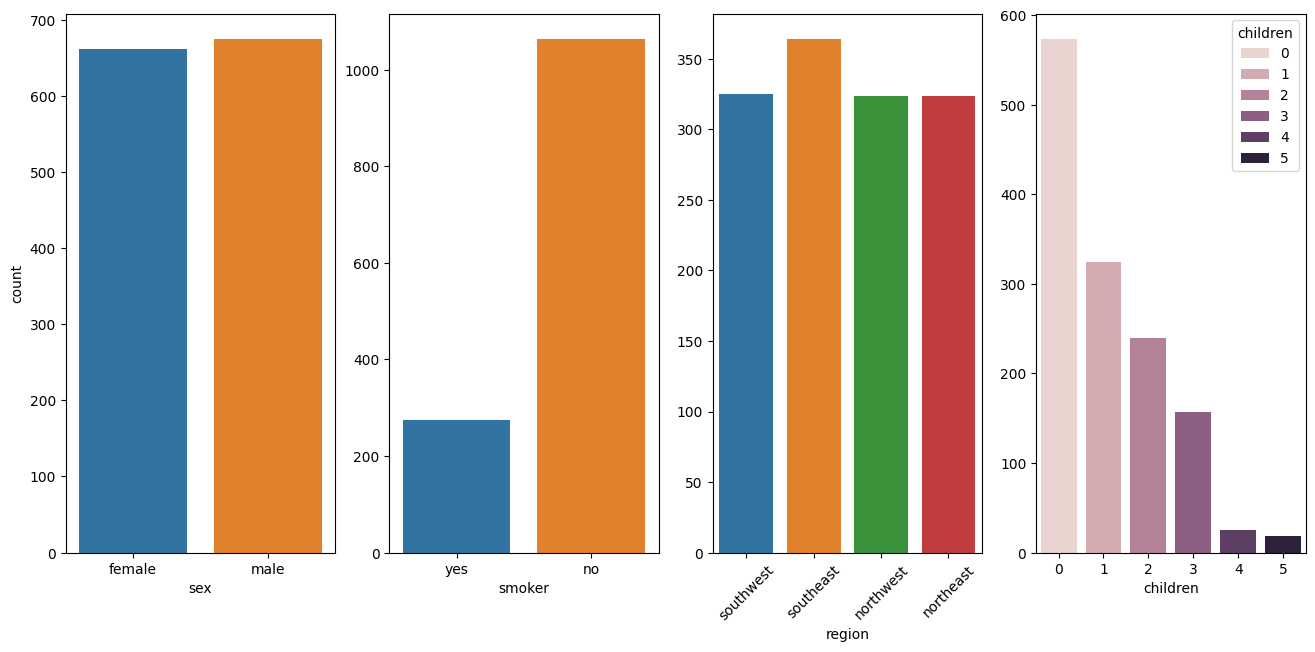

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,4,1)
sns.countplot(data = df, x= "sex" ,hue = "sex")

plt.subplot(1,4,2)
sns.countplot(data = df, x="smoker", hue="smoker")
plt.ylabel('')

plt.subplot(1,4,3)
sns.countplot(data = df , x= "region", hue = "region")
plt.xticks(rotation=45)
plt.ylabel('')

plt.subplot(1,4,4)
sns.countplot(data = df , x= "children", hue = "children")
plt.ylabel('')
plt.show()

- it show that proportions of male and female smokers are nearly the same
- Maximum number of customers are non-smoker
- most customers are from the "Southeast" region.
- Most customers have no children.

b. pie chart

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

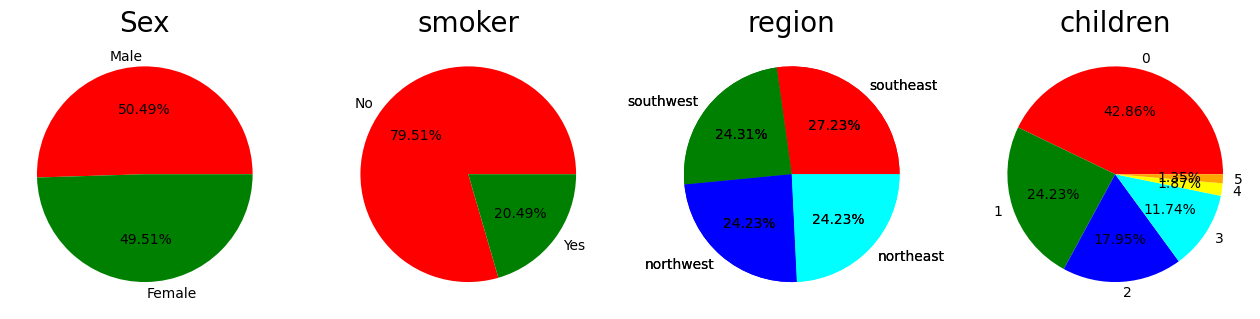

In [ ]:
plt.figure(figsize= (16,8))

plt.subplot(1, 4, 1)
size = df['sex'].value_counts()
labels = 'Male', 'Female'
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '%.2f%%')
plt.title('Sex', fontsize = 20)
plt.axis('off')

plt.subplot(1, 4, 2)
size = df['smoker'].value_counts()
labels = 'No', 'Yes'
color = ['red', 'green']
plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('smoker', fontsize = 20)
plt.axis('off')

plt.subplot(1, 4, 3)
size = df['region'].value_counts()
labels = 'southeast', 'southwest', 'northwest', 'northeast',
color = ['red', 'green', 'blue', 'cyan']
plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('region', fontsize = 20)
plt.axis('off')

plt.subplot(1, 4, 3)
size = df['region'].value_counts()
labels = 'southeast', 'southwest', 'northwest', 'northeast',
color = ['red', 'green', 'blue', 'cyan']
plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('region', fontsize = 20)
plt.axis('off')

plt.subplot(1, 4, 4)
size = df['children'].value_counts()
labels = '0', '1', '2', '3','4','5'
color = ['red', 'green', 'blue', 'cyan', 'yellow', 'orange']
plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('children', fontsize = 20)
plt.axis('off')
plt.show()

The pie chart gives similar insights as above count plot, but in terms of relative frequency or proportional distribution

#### 2. Numerical Data

a. Histogram

<Axes: xlabel='charges', ylabel='Count'>

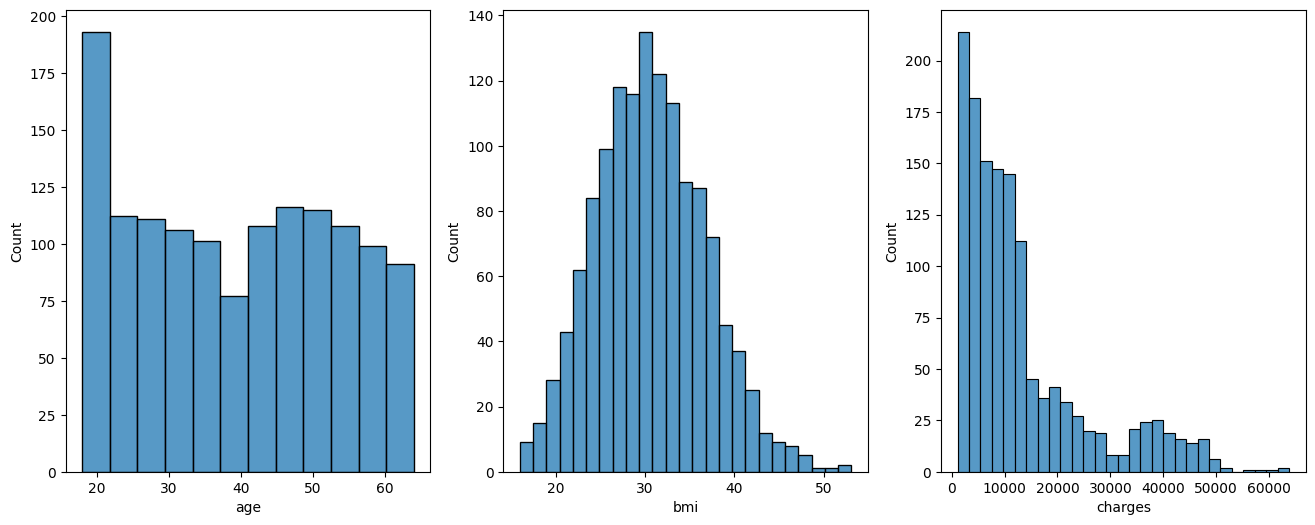

In [ ]:
plt.figure(figsize = (16,6))
plt.subplot(1,3,1)
sns.histplot(data=df, x=df.age)

plt.subplot(1,3,2)
sns.histplot(data=df, x=df.bmi)

plt.subplot(1,3,3)
sns.histplot(data=df, x=df.charges)

- The histogram of customer ages showing a significant concentration of policyholders within the 20 to 35-year-old.  
The age distribution above 40 seems more balanced
- The highest frequency is around a BMI of 30.
- Only a few customers have the highest number of charges.

b. kdeplot

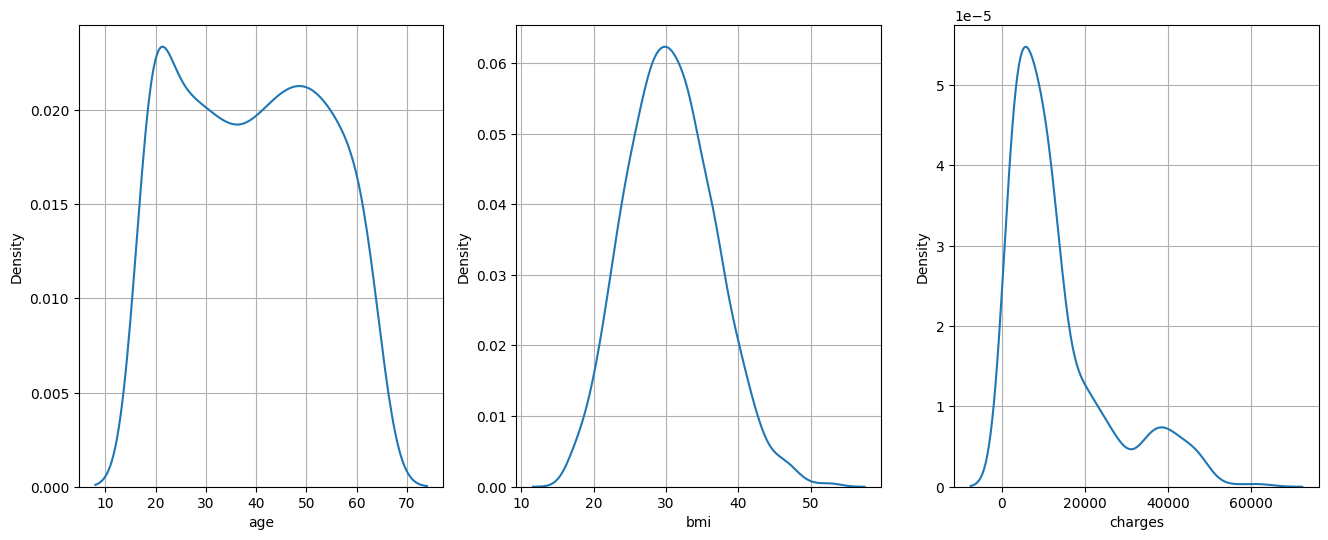

In [ ]:
plt.figure(figsize = (16,6))
plt.subplot(1,3,1)
sns.kdeplot(data=df, x=df.age)
plt.grid(True)

plt.subplot(1,3,2)
sns.kdeplot(data=df, x=df.bmi)
plt.grid(True)

plt.subplot(1,3,3)
sns.kdeplot(data=df, x=df.charges)
plt.grid(True)

plt.show()

- There is a lower probability density of customers aged 10 and 70
- There is the highest probability density of customers with a BMI of 30.
- There is a very low probability density of customers having charges above 60 thousand

c. Box Plot

<Axes: xlabel='charges'>

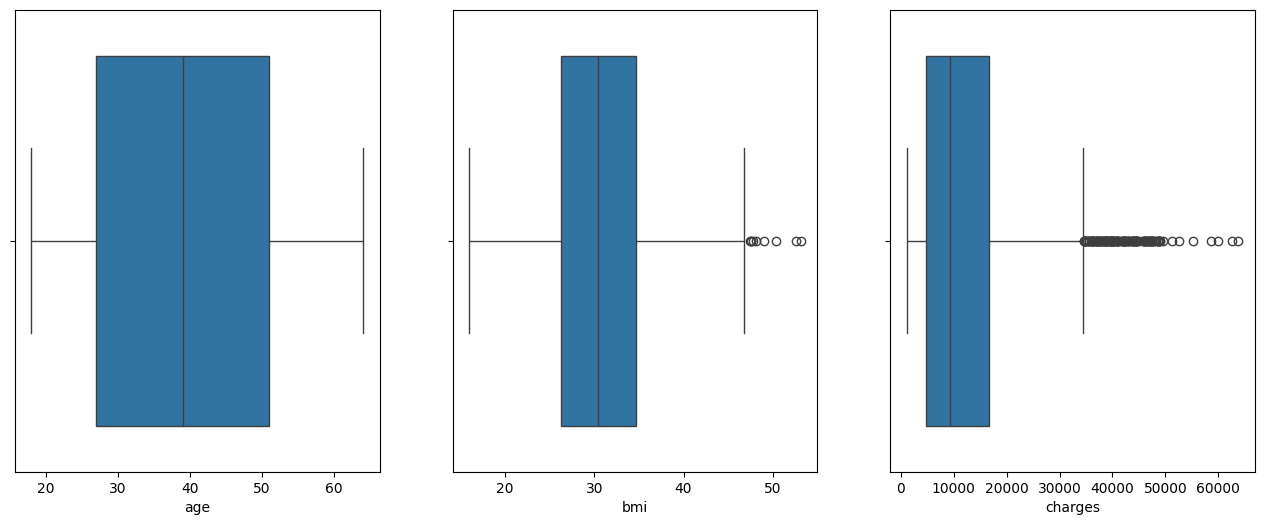

In [ ]:
plt.figure(figsize = (16,6))
plt.subplot(1,3,1)
sns.boxplot(data=df, x=df.age)

plt.subplot(1,3,2)
sns.boxplot(data=df, x=df.bmi)

plt.subplot(1,3,3)
sns.boxplot(data=df, x=df.charges)

- The charges show extreme skewness towards higher values and have significant outliers.

### Bivariate Analysis

##### 1. Scatter Plot
(numerical-numerical)

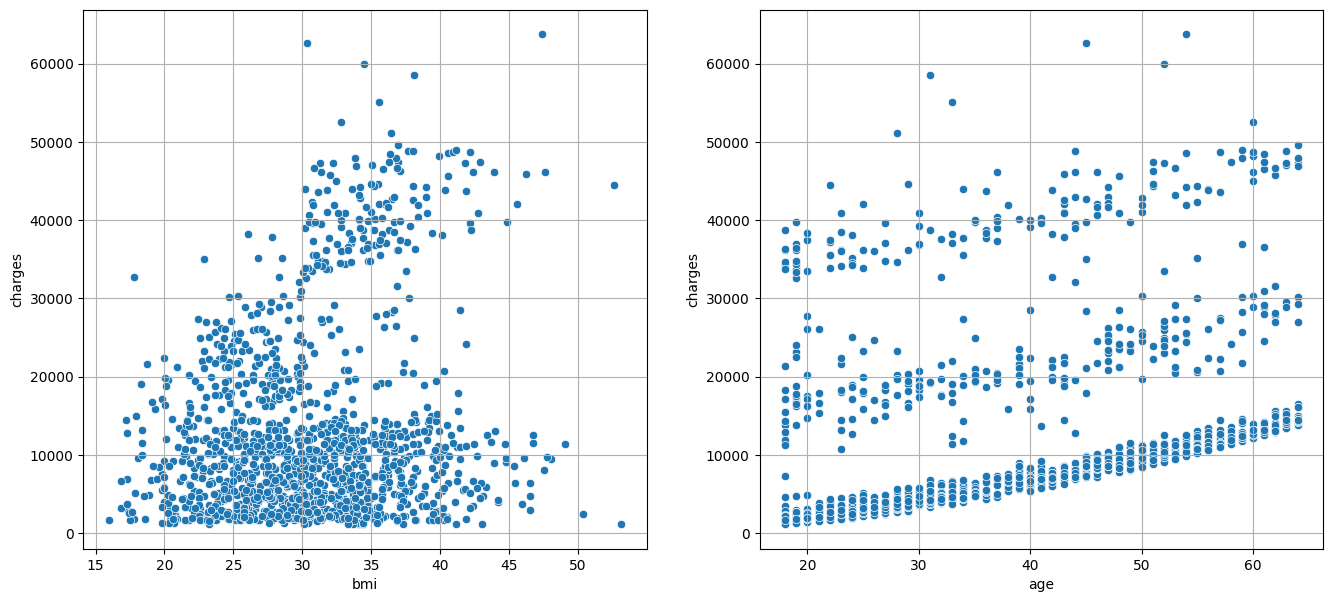

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="bmi", y="charges")
plt.grid()

plt.subplot(1,2,2)
sns.scatterplot(data=df, x="age", y="charges")
plt.grid()

- For some customers as there is positive relationship between bmi and charges but for some customers charges remain constants as bmi increases.

- As age increases charges are also increases but there three patterns in charges  
Group with low charges, mid charges and high charges

##### 2. Bar Plot
(numerical - categrical)

Text(0, 0.5, '')

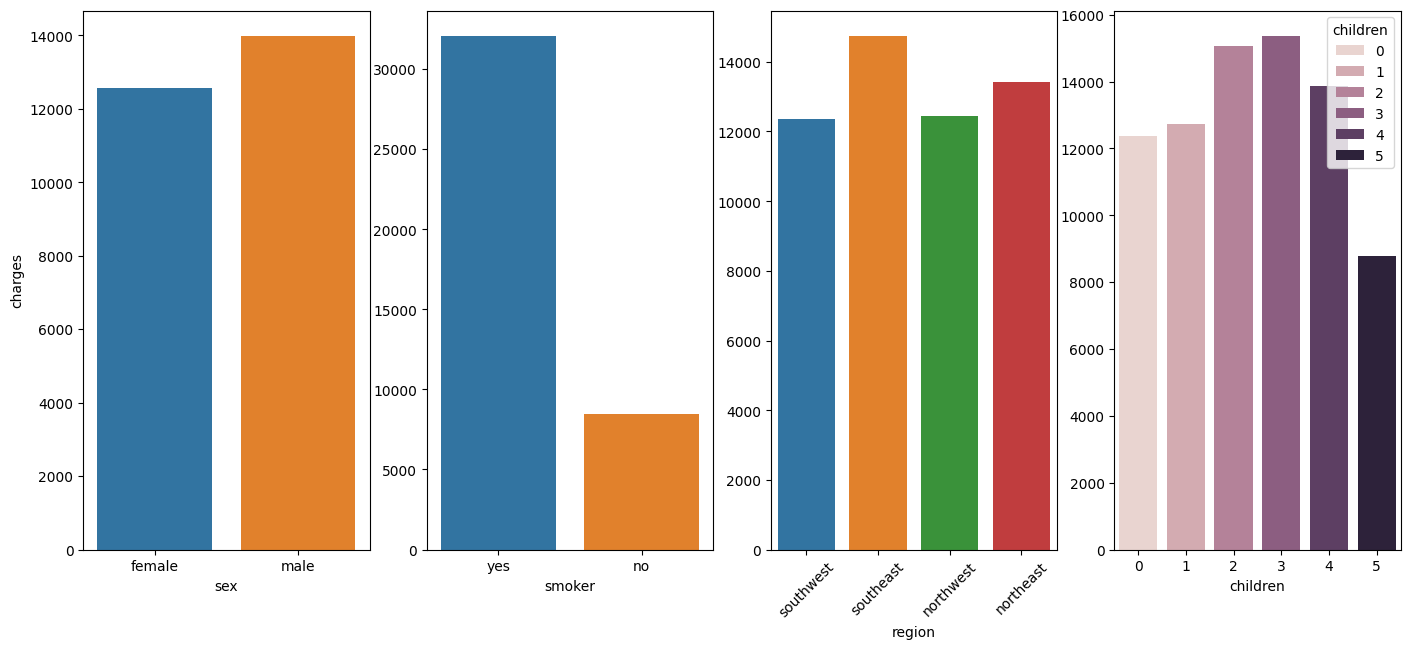

In [ ]:
plt.figure(figsize=(17,7))
plt.subplot(1,4,1)
sns.barplot(data = df, x= "sex", y="charges" ,hue = "sex", errorbar=None)

plt.subplot(1,4,2)
sns.barplot(data = df, x="smoker", y="charges", hue="smoker", errorbar=None)
plt.ylabel('')

plt.subplot(1,4,3)
sns.barplot(data = df , x= "region", y="charges", hue = "region", errorbar=None)
plt.xticks(rotation=45)
plt.ylabel('')

plt.subplot(1,4,4)
sns.barplot(data = df , x= "children", y="charges", hue = "children", errorbar=None)
plt.ylabel('')
plt.show()

-  average charges for males appear to be significantly higher than for females
- The charges for smokers are dramatically higher than for non-smokers
- The average charges vary by region. The Southeast has the highest charges
- The bar plot shows that charges do not vary drastically with the number of children. However, there is a slight increase but lower for customers having 5 childrean

##### 3. BoxPlot
(numerical - Categorical)

Text(0, 0.5, '')

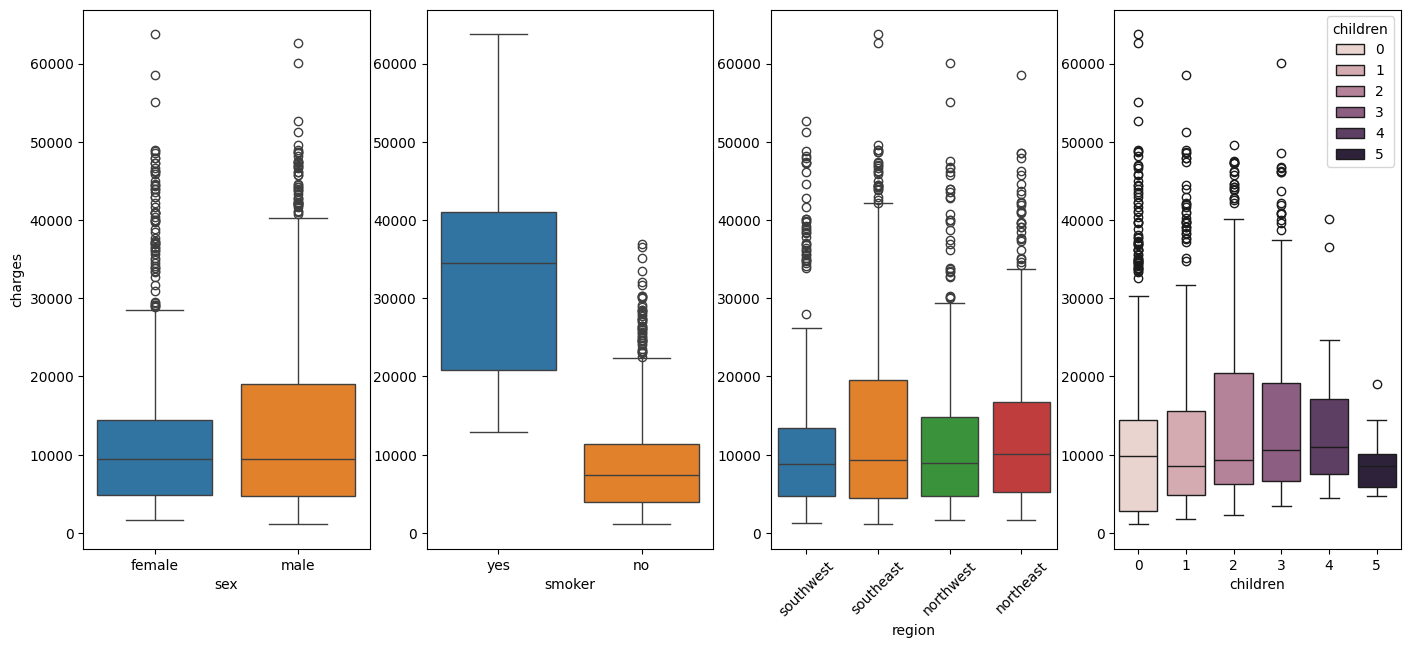

In [ ]:
plt.figure(figsize=(17,7))
plt.subplot(1,4,1)
sns.boxplot(data = df, x= "sex", y="charges" ,hue = "sex")

plt.subplot(1,4,2)
sns.boxplot(data = df, x="smoker", y="charges", hue="smoker")
plt.ylabel('')

plt.subplot(1,4,3)
sns.boxplot(data = df , x= "region", y="charges", hue = "region")
plt.xticks(rotation=45)
plt.ylabel('')

plt.subplot(1,4,4)
sns.boxplot(data = df , x= "children", y="charges", hue = "children")
plt.ylabel('')
plt.show()

Sex vs Charges: The box plot reveals minimal differences in median charges between males and females, suggesting that gender may not significantly influence insurance premiums.

Smoker vs Charges: A very clear and noticeable difference is observed between smokers and non-smokers, with smokers facing higher median charges and a wider range of costs. This highlights the financial impact of smoking on premiums.

Region vs Charges: The box plot illustrates regional variations in insurance costs, with some areas exhibiting higher median charges and greater spread. Areas with higher charges suggests that medical costs of that region could be higher than other.

Children vs Charges: The analysis shows that as the number of children increases, median charges also tend to rise, indicating that family size affects insurance premiums but except customers with 5 children, the overall distribution of charges is lower.

##### 4. KDE
(numerical - categorical)

Text(0, 0.5, '')

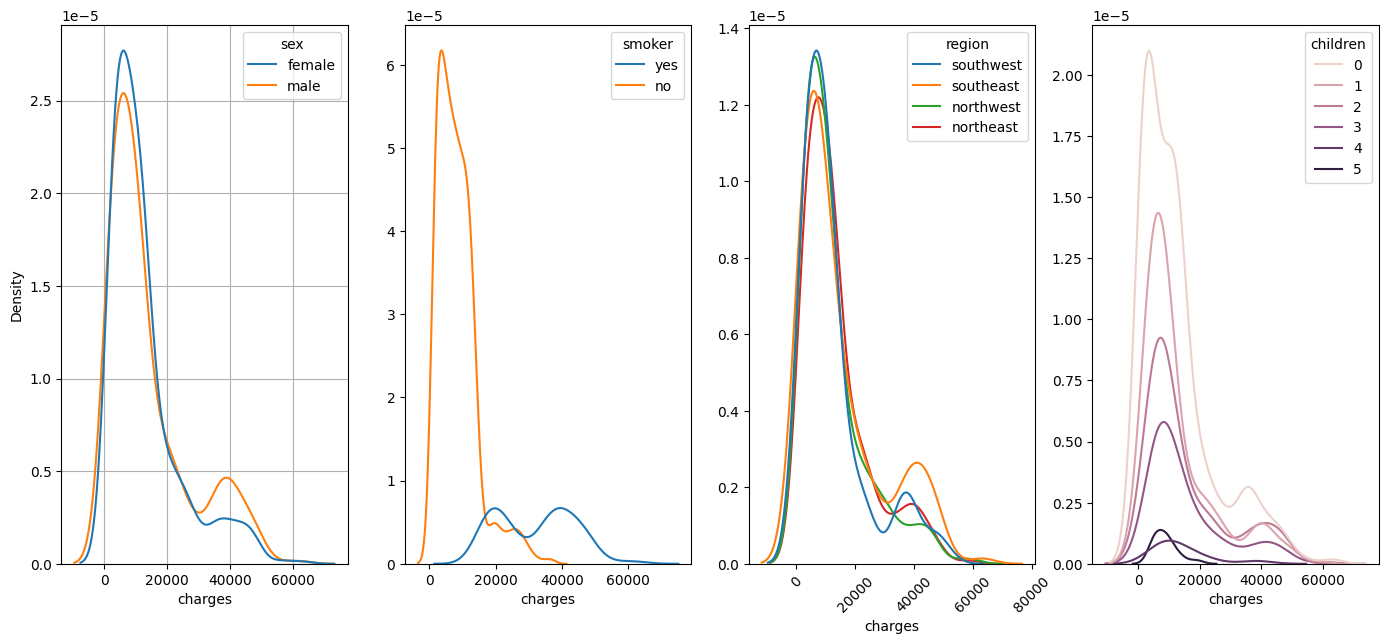

In [ ]:
plt.figure(figsize=(17,7))
plt.subplot(1,4,1)
sns.kdeplot(data = df, x="charges",hue = "sex")
plt.grid()

plt.subplot(1,4,2)
sns.kdeplot(data = df, x="charges", hue="smoker")
plt.ylabel('')

plt.subplot(1,4,3)
sns.kdeplot(data = df , x="charges", hue = "region")
plt.xticks(rotation=45)
plt.ylabel('')

plt.subplot(1,4,4)
sns.kdeplot(data = df , x= "charges", hue = "children")
plt.ylabel('')
plt.show()

- sex : There is a slight variation in the tails, indicating that charges for males and females could have some differences at higher charge values
- smoker: Non-smokers have a peak density at lower charge values, while smokers show a broader distribution with higher charges.
- region: There are slight variations, with the southeast and northeast having slightly more cases with higher charges
- children : there is a high probability density for customers with 0 children having insurance charges between 0 to 25,000.

##### 5. Heatmap
(categorical-categorical)

<Axes: xlabel='smoker', ylabel='region'>

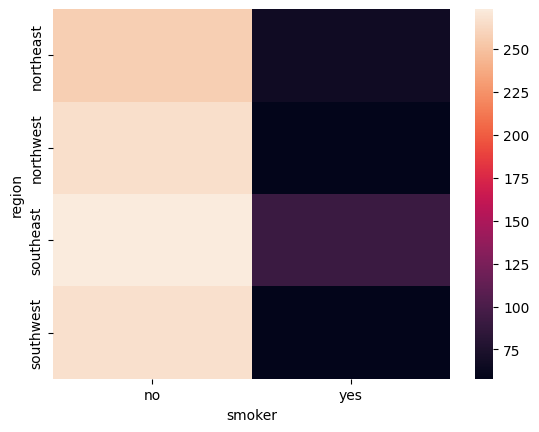

In [ ]:
sns.heatmap(pd.crosstab(df["region"], df["smoker"]))

Regions with darker shades in the smoker column indicate a higher concentration of smokers.
northeast and southwest regions have the highest number of non-smokers.

In [ ]:
pd.crosstab(df["region"], df["smoker"])

smoker,no,yes
region,,
northeast,257,67
northwest,266,58
southeast,273,91
southwest,267,58


### Multivariate Analysis

##### a. scatterplot

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: xlabel='age', ylabel='charges'>

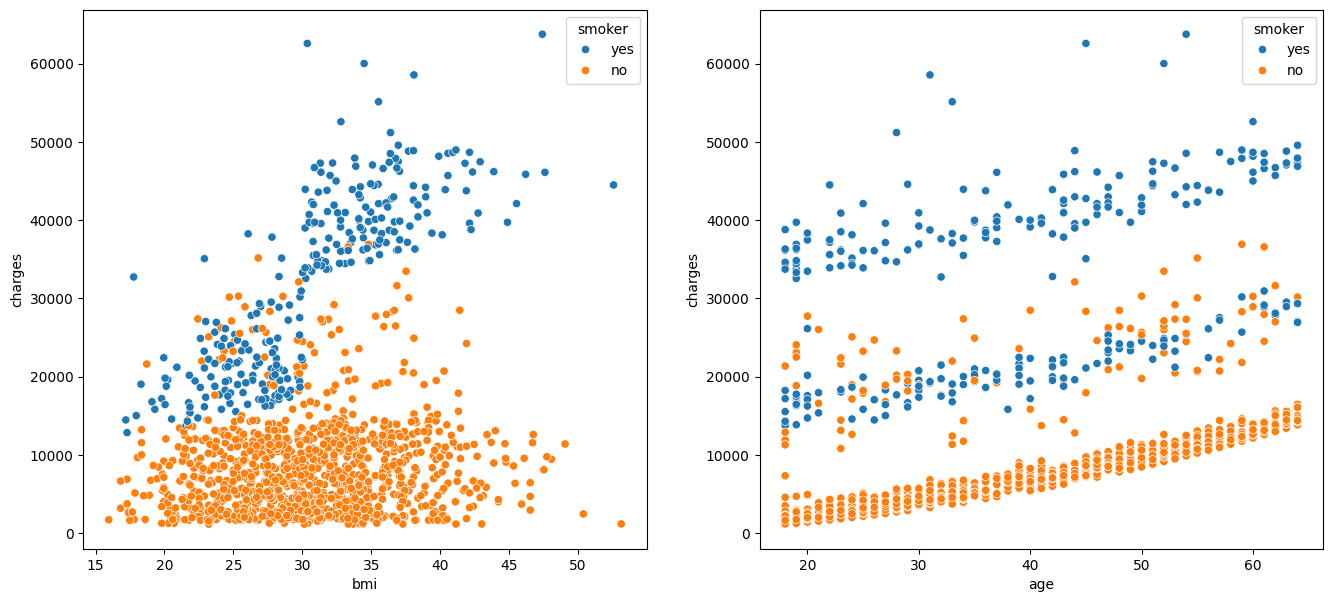

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker")

plt.subplot(1,2,2)
sns.scatterplot(data=df, x="age", y="charges", hue="smoker")

1. Smoker Status is the most significant factor influencing insurance charges. Smokers, regardless of age or BMI, face much higher premiums.
2. BMI and Age individually contribute to higher charges, but their effect is much more  for smokers. Smokers with a high BMI or advanced age incur the highest charges, reflecting their greater health risks.

##### b.barplot

Text(0, 0.5, '')

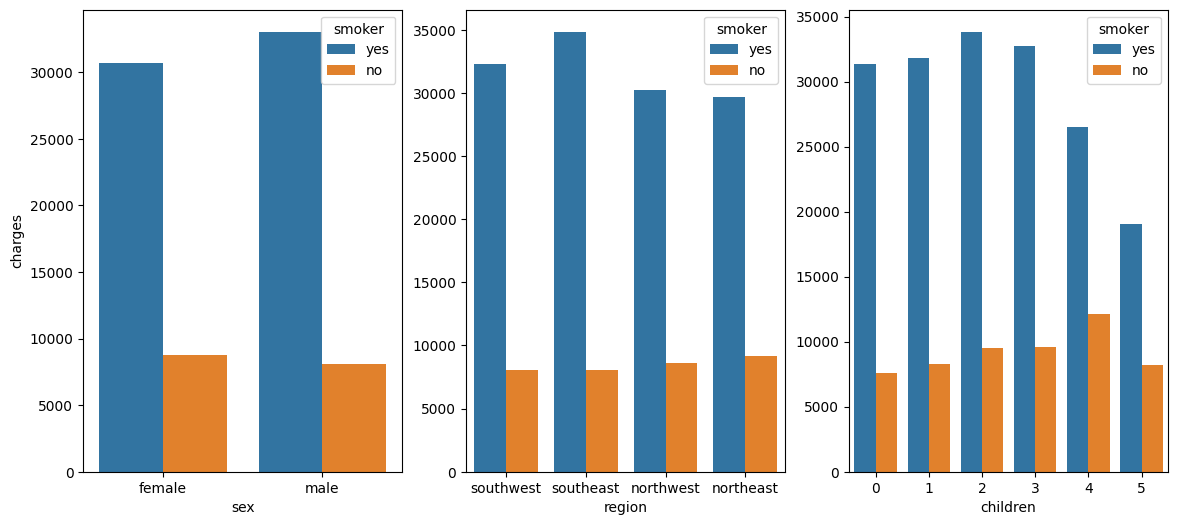

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
sns.barplot(data=df, x="sex", y="charges", hue="smoker", errorbar = None)

plt.subplot(1,3,2)
sns.barplot(data=df, x="region", y="charges", hue="smoker", errorbar = None)
plt.ylabel("")

plt.subplot(1,3,3)
sns.barplot(data=df, x="children", y ="charges" , hue="smoker", errorbar = None)
plt.ylabel("")
plt.show()

- There's no big difference in charges between male and female within the same smoking status.
- Among smokers, there are slight difference in charges across regions.
- Number of children doesn't affect the charges much — although people with 4 children may pay a bit more.